In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import names

In [2]:
def cleaner(data):
    all_names = set(names.words())
    lemmatizer = WordNetLemmatizer() #lemmatization
    data_cleaned = []
    for doc in data:
        doc = doc.lower()
        doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and word not in all_names)
        data_cleaned.append(doc_cleaned)
    return data_cleaned
    

In [3]:
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
groups = fetch_20newsgroups(subset='all',categories=categories)
label = groups.target
label_name = groups.target_names
data_cleaned = cleaner(groups.data)

<AxesSubplot: ylabel='Count'>

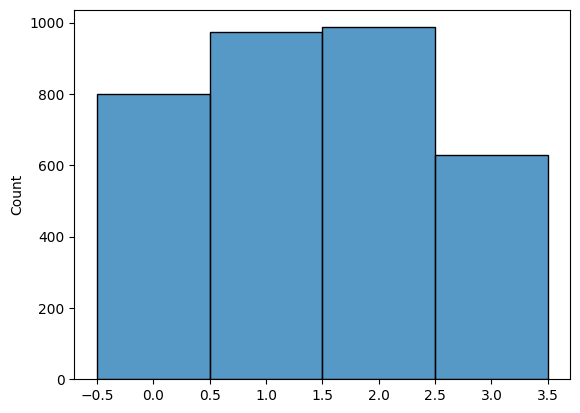

In [4]:
sns.histplot(label,discrete=True)


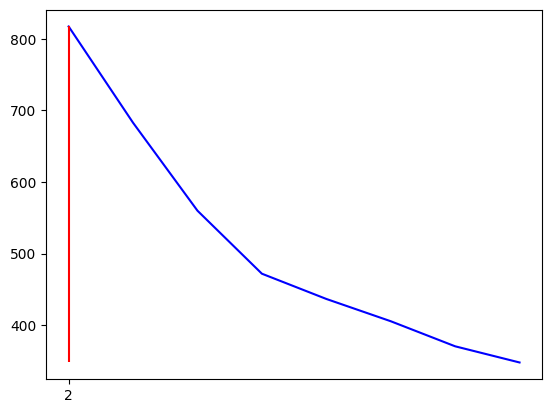

Counter({0: 3384, 1: 3})


In [5]:
calinski_harabasz = []
labels = []
count_vector_sw = CountVectorizer(stop_words="english",max_features=None, max_df=0.5, min_df=2)
data_cleaned_count = count_vector_sw.fit_transform(data_cleaned)
data = data_cleaned_count.toarray()
for i in range(2,10):

    km = KMeans(n_clusters=i,n_init=10)
    km.fit(data)
    clusters = km.labels_
    calinski_harabasz.append(calinski_harabasz_score(data, clusters))
    labels.append(clusters)

best = np.nanargmax(calinski_harabasz)+2

plt.figure()
plt.plot(np.arange(2,10),calinski_harabasz,'b-')
plt.vlines(best, np.nanmin(calinski_harabasz), np.nanmax(calinski_harabasz), color="red")
plt.xticks(sorted(set([best])))
plt.show()

print(Counter(labels[best-2]))


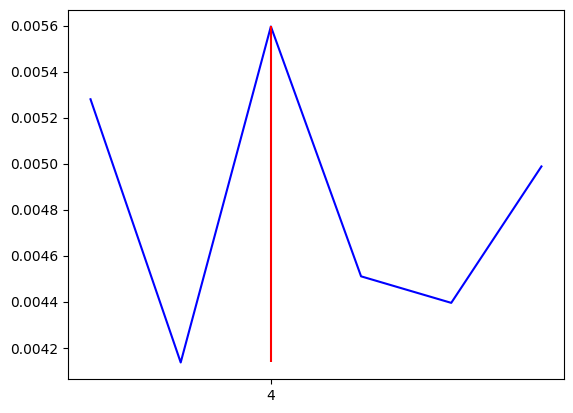

Counter({1: 1466, 0: 761, 2: 584, 3: 576})


In [18]:
tfid_vector = TfidfVectorizer(stop_words="english",max_features=None, max_df=0.5, min_df=2)
data_cleaned_count = tfid_vector.fit_transform(data_cleaned)
data = data_cleaned_count.toarray()
silhouette = []
labels = []
for i in range(2,8):
    km = KMeans(n_clusters=i,n_init='auto',random_state=12)
    km.fit(data)
    clusters = km.labels_
    silhouette.append(silhouette_score(data, clusters))
    labels.append(clusters)

best = np.nanargmax(silhouette)+2


plt.figure()
plt.plot(np.arange(2,8),silhouette,'b-')
plt.vlines(best, np.nanmin(silhouette), np.nanmax(silhouette), color="red")
plt.xticks(sorted(set([best])))
plt.show()

print(Counter(labels[best-2]))

In [14]:
kmeans = KMeans(n_clusters=best,n_init='auto',random_state=12).fit(data)
clusters = kmeans.labels_

cluster_label = {i: label[np.where(clusters == i)] for i in range(best)}
terms = tfid_vector.get_feature_names_out()

centroids = kmeans.cluster_centers_
for cluster, index_list in cluster_label.items():
    counter = Counter(cluster_label[cluster])
    print('cluster_{}: {} samples'.format(cluster, len(index_list)))
    for label_index, count in sorted(counter.items(),
                              key=lambda x: x[1], reverse=True):
        print('{}: {} samples'.format(label_name[label_index], count))
    print('Top 10 terms:')
    for ind in centroids[cluster].argsort()[-10:]:
        print(' %s' % terms[ind], end="")
    print('\n')

cluster_0: 761 samples
comp.graphics: 715 samples
sci.space: 43 samples
alt.atheism: 2 samples
talk.religion.misc: 1 samples
Top 10 terms:
 format know thanks need looking university program file graphic image

cluster_1: 1466 samples
alt.atheism: 457 samples
talk.religion.misc: 385 samples
sci.space: 369 samples
comp.graphics: 255 samples
Top 10 terms:
 time people think know like just ha university article wa

cluster_2: 584 samples
alt.atheism: 339 samples
talk.religion.misc: 242 samples
comp.graphics: 2 samples
sci.space: 1 samples
Top 10 terms:
 believe think moral morality jesus people wa say christian god

cluster_3: 576 samples
sci.space: 574 samples
alt.atheism: 1 samples
comp.graphics: 1 samples
Top 10 terms:
 zoology just moon hst mission nasa launch wa shuttle space

